# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [2]:
import os, sys, time

import nltk
import spacy

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

## 1.3 Loading data

In [4]:
# our file

data = "./data/source/"
os.listdir(data)

['superheroes_nlp_dataset.csv']

In [6]:
# load dataframe

fn = data + 'superheroes_nlp_dataset.csv'

df = pd.read_csv(fn)

In [7]:
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. First Tour

## 2.1 display

In [11]:
df.head(5)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.sample(10)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1034,Psimon,Simon Jones,NaN,11,While performing experiments to contact altern...,NaN,95,30,40,35,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,Winter Soldier,Bucky Barnes,James Buchanan Barnes,6,"Early Life Born in 1925, James Buchanan Barnes...",Thanks to Nick Fury and his Infinity Formula...,80,30,35,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
488,Flash IV,Bartholomew Allen II,Bartholomew Allen II,10,Bart Allen is a teenage speedster and a membe...,Bart is a metahuman who can run and move his l...,80,10,100,30,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
739,Killer Bee,NaN,NaN,14,Killer Bee is a shinobi from Kumogakure. He is...,NaN,75,95,70,95,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
167,Bishop,Lucas Bishop,Lucas Bishop,9,The mutant known only as Bishop was born in t...,Can absorb most types of energy directed tow...,80,15,25,75,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1296,The Punisher (War Zone),Frank Castle,NaN,7,Five years into waging his one-man war on the ...,NaN,90,15,25,45,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
600,Hit-Girl,Mindy McCready,Mindy McCready,5,Hit-Girl (she has not yet been called by anoth...,NaN,80,5,30,20,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1117,Sabretooth (FOX),Victor Creed,NaN,9,Victor Creed was born in the mid-late 1820s in...,"Like his half-brother Logan, Victor's primary ...",80,70,65,90,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1344,Ubu,Ubu,NaN,5,Ubu is the name given to several men who act a...,NaN,80,20,30,20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
862,Matt Parkman,Matthew Parkman,Matthew Parkman,6,Matt Parkman is a detective in the New York Po...,"Matt has the ability of telepathy, an ability...",80,10,10,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.tail(5)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1445,Zatanna,Zatanna Zatara,Zatanna Zatara,10,Zatanna is the daughter of adventurer John Zat...,Zatanna is genetically talented with her magi...,90,10,25,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446,Zero,DWN-∞: Zero,DWN-∞: Zero,18,Zero was created by the late Dr. Albert Wily ...,NaN,80,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1447,Zoom (New 52),Hunter Zolomon,NaN,20,"Hunter Zolomon is better known as Zoom, a spee...",After tricking Barry Allen and Wally West into...,95,50,100,75,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1448,Zoom,Hunter Zolomon,Hunter Zolomon,9,Hunter Zolomon had a troubled relationship wi...,"Zoom is able to alter time, to make himself ev...",75,10,100,30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1449,Zzzax,NaN,NaN,5,Zzzax was the product of an accident that occu...,NaN,45,80,75,95,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## 2.2 Structure

In [14]:
df.shape

(1450, 81)

In [15]:
df.dtypes

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [17]:
df.dtypes.value_counts()

float64    50
object     25
int64       6
dtype: int64

In [24]:
tmp = df.nunique()
tmp

name                  1448
real_name             1068
full_name              840
overall_score           93
history_text          1349
                      ... 
has_super_speed          2
has_durability           2
has_stamina              2
has_agility              2
has_super_strength       2
Length: 81, dtype: int64

In [25]:
tmp[tmp <10]

alignment                           3
gender                              2
has_electrokinesis                  2
has_energy_constructs               2
has_mind_control_resistance         2
has_matter_manipulation             2
has_telepathy_resistance            2
has_mind_control                    2
has_enhanced_hearing                2
has_dimensional_travel              2
has_element_control                 2
has_size_changing                   2
has_fire_resistance                 2
has_fire_control                    2
has_dexterity                       2
has_reality_warping                 2
has_illusions                       2
has_energy_beams                    2
has_peak_human_condition            2
has_shapeshifting                   2
has_heat_resistance                 2
has_jump                            2
has_self-sustenance                 2
has_energy_absorption               2
has_cold_resistance                 2
has_magic                           2
has_telekine

In [26]:
tmp[tmp>1000]

name                1448
real_name           1068
history_text        1349
powers_text         1061
superpowers         1315
first_appearance    1092
img                 1363
dtype: int64

## 2.3 NaN and duplicated

In [19]:
df.isna().mean().sort_values()

aliases               0.000000
overall_score         0.000000
teams                 0.000000
alter_egos            0.000000
intelligence_score    0.000000
                        ...   
full_name             0.340690
relatives             0.378621
base                  0.394483
place_of_birth        0.456552
skin_color            0.880690
Length: 81, dtype: float64

<AxesSubplot:>

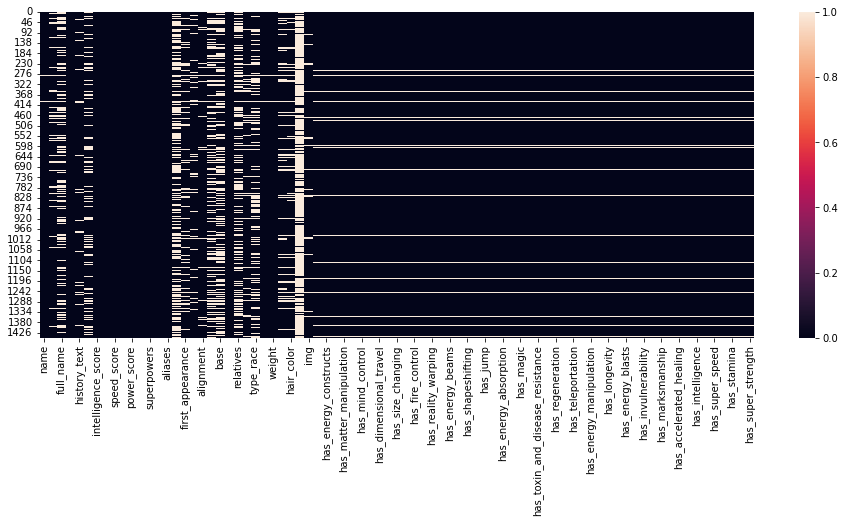

In [21]:
tmp = df.isna().mean()

fig, ax = plt.subplots(1,1, figsize=(16, 6))
sns.heatmap(df.isna())


In [28]:
df.duplicated().sum()

0

## 2.4 Data inspection

In [29]:
df.describe(include=np.number)

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,...,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,...,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.describe(include=np.object)

/tmp/ipykernel_26967/3211851552.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,name,real_name,full_name,overall_score,history_text,powers_text,superpowers,alter_egos,aliases,place_of_birth,...,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img
count,1448,1301,956,1450,1360,1086,1450,1450,1450,788,...,1450,901,1305,1043,1448,1448,1186,1202,173,1363
unique,1448,1068,840,93,1349,1061,1315,522,947,448,...,419,844,2,67,120,246,25,31,15,1363
top,3-D Man,Unknown,Unknown,6,Childhood Trauma Robert Bruce Banner was the s...,No known powers.,[],[],[''],Earth-1,...,[],None,Male,Human,-,-,Blue,Black,Green,/pictures2/portraits/11/050/10038.jpg?v=156096...
freq,1,22,15,162,3,7,67,928,475,31,...,900,23,970,529,365,426,368,339,30,1


# 3. Cleaning

## 3.1 select columns

In [31]:
tmp = df.dtypes
tmp

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

In [32]:
tmp[tmp =="object"]

name                object
real_name           object
full_name           object
overall_score       object
history_text        object
powers_text         object
superpowers         object
alter_egos          object
aliases             object
place_of_birth      object
first_appearance    object
creator             object
alignment           object
occupation          object
base                object
teams               object
relatives           object
gender              object
type_race           object
height              object
weight              object
eye_color           object
hair_color          object
skin_color          object
img                 object
dtype: object

In [34]:
cols = ["name", "history_text"]
df = df[cols]
df.head()

,name,history_text
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ..."
1,514A (Gotham),He was one of the many prisoners of Indian Hil...
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ..."
3,Aa,Aa is one of the more passive members of the P...
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...


In [35]:
df.isna().sum()

name             2
history_text    90
dtype: int64

In [36]:
df = df[df.name.notna()]
df = df[df.history_text.notna()]
df.head()

,name,history_text
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ..."
1,514A (Gotham),He was one of the many prisoners of Indian Hil...
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ..."
3,Aa,Aa is one of the more passive members of the P...
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...


In [37]:
df.isna().mean()

name            0.0
history_text    0.0
dtype: float64

In [ ]:
df